# Lesson 6 Assignment - Advertising Sales Regression
## Author - Salinee Kingbaisomboon
### UW NetID: 1950831

### Instructions  
Perform four different linear regressions on advertising sales data located in 'Advertising.csv'.  Your dependent feature is 'sales', a measure of sales of a product in a given market in thousands of dollars. 

The independent features for each of the first 3 separate regressions are:

 1. 'TV': advertising dollars spent on TV ads for a single product in a given market
 2. 'radio': advertising dollars spent on radio ads
 3. 'newspaper': advertising dollars spent on newspaper ads

For the first 3 linear regression performed:

- Produce a labeled graph showing the best fit line with the data points.
- Interpret both the slope and y-intercept.
 
The final regression(#4) includes all 3 features: (a) TV, (b) radio, and (c) newspaper. 
- Interpret each partial slope and the intercept parameters.
- Interpret the adjusted R-squared.
- Find and report the mean-squared error.

#### Please prepare this information for a client who may not understand what the parameters mean.


In [45]:
# Import libraries
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as sm
import seaborn as sns

import warnings

warnings.filterwarnings("ignore") # To suppress warning

%matplotlib inline

# Declare Functions used in this assignment

In [8]:
# Create a scale function for a column in a pandas df
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [22]:
# Function to plot the Linear Regression Model's graph
def plot_linear_regression_model(data, x_column, y_column):
    # First initialize the model.
    model = linear_model.LinearRegression()
    
    # Fit the model to the data
    n_points = len(data)
    x_input = data[x_column].values.reshape(n_points, 1)
    y_output = data[y_column].values.reshape(n_points, 1)
    
    model.fit(x_input, y_output)
    
    # Get predictions
    y_pred = model.predict(x_input)

    # Plot output
    plt.scatter(x_input, y_output)
    plt.plot(x_input, y_pred, linewidth=2)
    plt.grid(True)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(x_column + ' vs' + y_column)
    
    # Print model parameters
    # Get slope (m) and y-intercept (b)
    print('Intercept: {0:.5f}'.format(model.intercept_[0]))
    print('Slope : {0:.5f}'.format(model.coef_[0][0]))

In [70]:
# Function to compute the Linear Regression Statistic
def compute_linear_regression_statistic(data, formula, y_column):
    # Fit the model to the data
    n_points = len(data)
    y_output = data[y_column].values.reshape(n_points, 1)
    
    ols_model = sm.ols(formula = formula, data=data)
    
    results = ols_model.fit()
    y_pred = results.predict()
    
    data['predicted'] = y_pred
    
    string = '               View Y predict based on all input features:'
    print(f'\033[92m\033[1m{string}\033[0m')
    display(data)
    
    print('\nSSE, SST, SSR, and RMSE:')
    mean_y = np.mean(y_output)
    sst = np.sum((y_output - mean_y)**2)
    sse = sst - results.ssr
    print('SSE: {}'.format(sse))
    print('SST: {}'.format(sst))
    print('SSR: {}'.format(results.ssr))
    print('RMSE: {}'.format(np.sqrt(results.mse_model)))
    
    # Get most of the linear regression statistics we are interested in:
    print(results.summary())
    
    # Plot a histogram of the residuals
    sns.distplot(results.resid, hist=True)
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.title('Residual Histogram')

In [11]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/Advertising.csv'
ad_data = pd.read_csv(filename, index_col=0)

# Scale the features or independent variables (the most common practice)
ad_data['TV_scale'] = scale(ad_data['TV'])
ad_data['radio_scale'] = scale(ad_data['radio'])
ad_data['newspaper_scale'] = scale(ad_data['newspaper'])

print(ad_data.head())
print(ad_data.shape)
ad_data.describe()

      TV  radio  newspaper  sales  TV_scale  radio_scale  newspaper_scale
1  230.1   37.8       69.2   22.1  0.969852     0.981522         1.778945
2   44.5   39.3       45.1   10.4 -1.197376     1.082808         0.669579
3   17.2   45.9       69.3    9.3 -1.516155     1.528463         1.783549
4  151.5   41.3       58.5   18.5  0.052050     1.217855         1.286405
5  180.8   10.8       58.4   12.9  0.394182    -0.841614         1.281802
(200, 7)


,TV,radio,newspaper,sales,TV_scale,radio_scale,newspaper_scale
count,200.000000,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,147.042500,23.264000,30.554000,14.022500,1.121325e-16,-1.638689e-15,2.031708e-16
std,85.854236,14.846809,21.778621,5.217457,1.002509e+00,1.002509e+00,1.002509e+00
min,0.700000,0.000000,0.300000,1.600000,-1.708823e+00,-1.570868e+00,-1.392646e+00
25%,74.375000,9.975000,12.750000,10.375000,-8.485295e-01,-8.973206e-01,-8.195504e-01
50%,149.750000,22.900000,25.750000,12.900000,3.161515e-02,-2.457858e-02,-2.211368e-01
75%,218.825000,36.525000,45.100000,17.400000,8.381955e-01,8.954299e-01,6.695788e-01
max,296.400000,49.600000,114.000000,27.000000,1.744029e+00,1.778300e+00,3.841171e+00


## 1. Linear Regression between Sales (dependent) and TV (independent)

Intercept: 14.02250
Slope : 4.07101


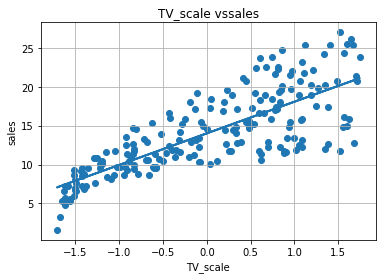

In [72]:
plot_linear_regression_model(ad_data, 'TV_scale', 'sales')

***
### Examine result:
**Y Intercept = 14.02250**:  When spends no money on TV ads  (zero), sales will be 14,022.50 dollars.
    
**Slope = 4.07101**:  When we spends money on TV ads by 1 dollar, then we expect that sales will go up by 4,071.01 dollars.

**Based on the plot:** We found that the TV advertising has a strong positive effects on Sales. 
***

## 2. Linear Regression between Sales (dependent) and Radio (independent)

Intercept: 14.02250
Slope : 2.99889


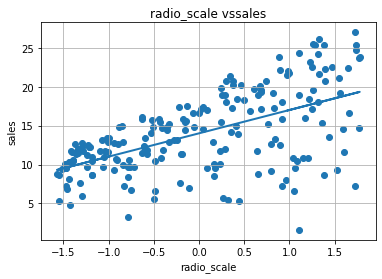

In [28]:
plot_linear_regression_model(ad_data, 'radio_scale', 'sales')

***
### Examine result:
**Y Intercept = 14.02250**:  When spends no money on radio advertising (zero), sales will be 14,022.50 dollars.
    
**Slope = 2.99889**:  When we spends money on radio advertising by 1 dollar, then we expect that sales will go up by 2,998.89 dollars.

**Based on the plot:** We found that the radio advertising has medium positive effects on Sales (compared with TV ads since the slope of TV ads is greater). 
***

## 3. Linear Regression between Sales (dependent) and Newspaper (independent)

Intercept: 14.02250
Slope : 1.18816


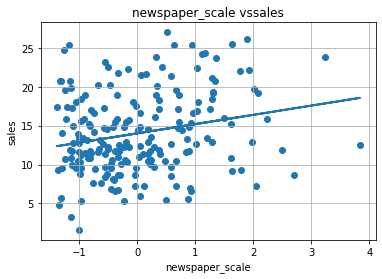

In [29]:
plot_linear_regression_model(ad_data, 'newspaper_scale', 'sales')

***
### Examine result:
**Y Intercept = 14.02250**:  When spends no money on newspaper advertising (zero), sales will be 14,022.50 dollars.
    
**Slope = 1.18816**:  When we spends money on radio advertising by 1 dollar, then we expect that sales will go up by 1,188.16 dollars.

**Based on the plot:** We found that the radio advertising has less positive effects on Sales (compared with TV and radio advertising since the slope is lesser). 
***

## 4. Linear Regression between Sales (dependent) and All Three Features - TV, Radio, Newspaper (independent)

               View Y predict based on all input features:


,TV,radio,newspaper,sales,TV_scale,radio_scale,newspaper_scale,predicted
1,230.1,37.8,69.2,22.1,0.969852,0.981522,1.778945,20.523974
2,44.5,39.3,45.1,10.4,-1.197376,1.082808,0.669579,12.337855
3,17.2,45.9,69.3,9.3,-1.516155,1.528463,1.783549,12.307671
4,151.5,41.3,58.5,18.5,0.052050,1.217855,1.286405,17.597830
5,180.8,10.8,58.4,12.9,0.394182,-0.841614,1.281802,13.188672
...,...,...,...,...,...,...,...,...
196,38.2,3.7,13.8,7.6,-1.270941,-1.321031,-0.771217,5.370342
197,94.2,4.9,8.1,9.7,-0.617035,-1.240003,-1.033598,8.165312
198,177.0,9.3,6.4,12.8,0.349810,-0.942899,-1.111852,12.785921
199,283.6,42.0,66.2,25.5,1.594565,1.265121,1.640850,23.767321



SSE, SST, SSR, and RMSE:
SSE: 4860.323487097813
SST: 5417.14875
SSR: 556.8252629021872
RMSE: 40.250563089633964
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           1.58e-96
Time:                        14:11:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-------------

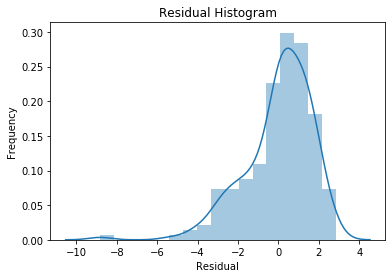

In [71]:
compute_linear_regression_statistic(ad_data, 'sales ~ TV_scale + radio_scale + newspaper_scale', 'sales')

When we put all three features (TV, Radio and Newspaper) together in a model, we found a slighly different statistics as following:

***
### Summary for TV:
**Y Intercept = 14.02250**:  When spends no money on TV ads  (zero), sales will be 14,022.50 dollars.
    
**Slope = 3.9193**:  When we spends money on TV ads by 1 dollar, then we expect that sales will go up by 3,919.3 dollars.

**Based on the plot:** We found that the TV advertising still has a strongest positive effects on Sales but in a lesser degree since the slope is decrease when the model has only TV as an only one feature. (From 4,071.01 to 3,919.3 dollars)
### Summary for Radio:
**Y Intercept = 14.02250**:  When spends no money on radio advertising (zero), sales will be 14,022.50 dollars.
    
**Slope = 2.7921**:  When we spends money on radio advertising by 1 dollar, then we expect that sales will go up by 2,792.1 dollars.

**Based on the plot:** We found that the radio advertising has medium positive effects on Sales but in a lesser degree since the slope is decrease when the model has only radio as an only one feature. (From 2,998.89 to 2,792.1 dollars) 

### Summary for Newspaper:
**Y Intercept = 14.02250**:  When spends no money on newspaper advertising (zero), sales will be 14,022.50 dollars.
    
**Slope = -0.0225**:  When we spends money on radio advertising by 1 dollar, then we expect that sales will decreate by 225 dollars.

**Based on the plot:** We found that the radio advertising has negative effects on Sales (compared when the model has only newspaper as an only one feature). This may due to the fact that people this day consume less from newspapers (compared with TV and radio altogether). So, it's better for the client not to spend money on the newspaper advertising any more. 
***

- **Adjusted R-suqared = 0.896**: 89.6% of the variation in the output variable is explained by the input variables. This tells us that by adding variables will improve our existing model.
- **Mean-Qquared Error (RMSE) = 40.250563089633964**: 40.250563089633964x1,000 = 40,250.56 dollars is the square root of the average of squared differences between the prediction of sales and your actual observation. In terms of thousand dollars in sales, this error is quite significant. Therefore, this model didn't represent the data very well.